# AV_Black_Friday_Sales_Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('BlackFridaySalesPredictionTrain.csv')
test = pd.read_csv('BlackFridaySalesPredictionTest.csv')

train.shape, test.shape

((550068, 12), (233599, 11))

In [3]:
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index = True)
data.shape

(783667, 13)

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [5]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,783667,NaN,NaN,NaN,1.00303e+06,1727.27,1e+06,1.00152e+06,1.00308e+06,1.00448e+06,1.00604e+06
Product_ID,783667,3677,P00265242,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,783667,2,M,590031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,783667,7,26-35,313015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,783667,NaN,NaN,NaN,8.0793,6.52221,0,2,7,14,20
City_Category,783667,3,B,329739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,783667,5,1,276425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,783667,NaN,NaN,NaN,0.409777,0.491793,0,0,0,1,1
Product_Category_1,783667,NaN,NaN,NaN,5.3662,3.87816,1,1,5,8,20
Product_Category_2,537685,NaN,NaN,NaN,9.84451,5.08909,2,5,9,15,18


In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

## Imputing Missing Values

In [7]:
data['Product_Category_2'].fillna(value = 0, inplace = True)
data['Product_Category_3'].fillna(value = 0, inplace = True)

In [8]:
cat_var = data.drop(['Product_ID', 'source'], axis = 1).select_dtypes('object')

for i in cat_var:
    print('************************************')
    print(data[i].value_counts())

************************************
M    590031
F    193636
Name: Gender, dtype: int64
************************************
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
************************************
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
************************************
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64


## Single Variable Data Analysis

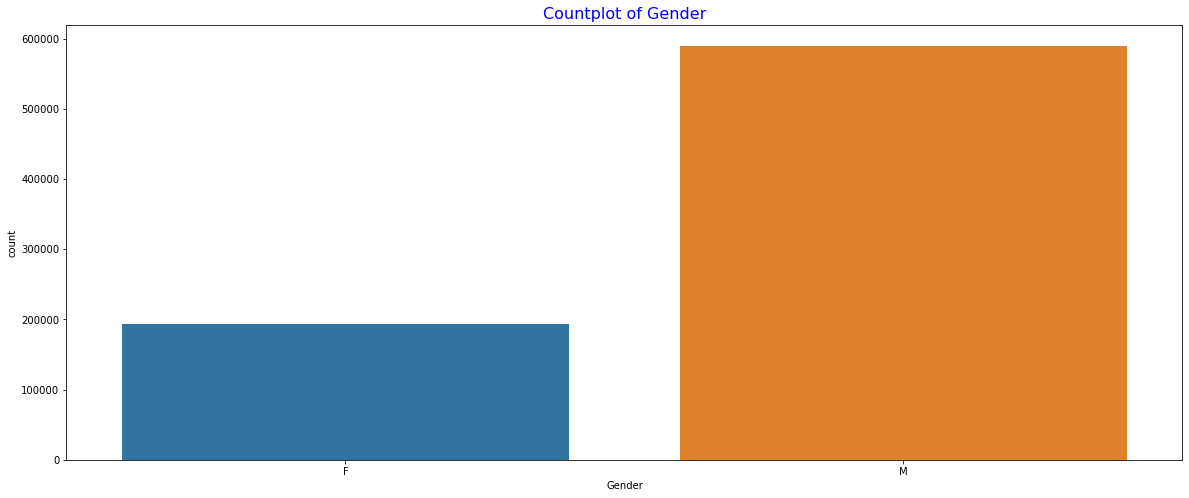

In [9]:
plt.figure(figsize = (20, 8))
sns.countplot(data['Gender'])
plt.title('Countplot of Gender', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

* Majority are Males.

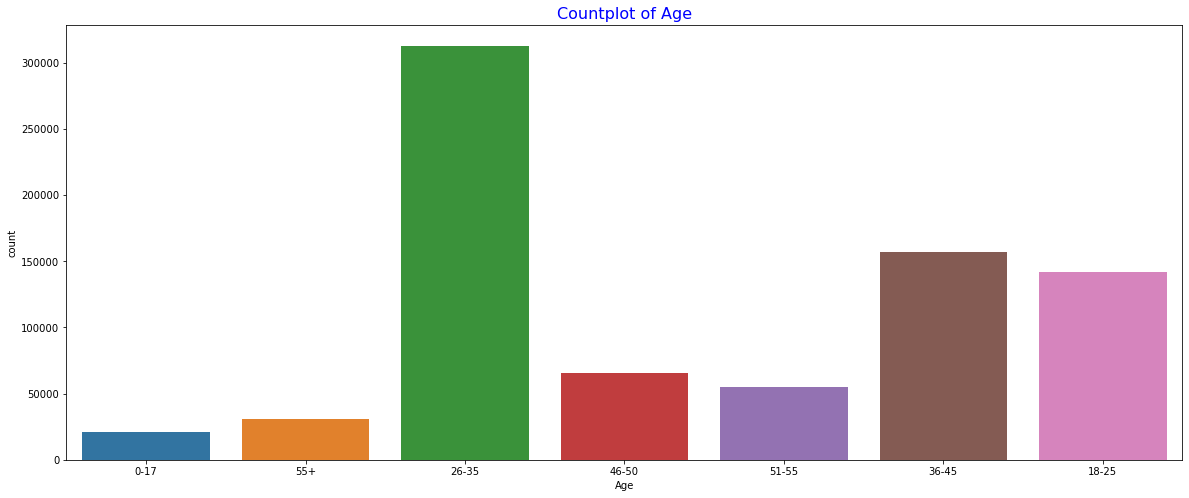

In [10]:
plt.figure(figsize = (20, 8))
sns.countplot(data['Age'])
plt.title('Countplot of Age', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

* Majority of the people are in between Age 26-35.

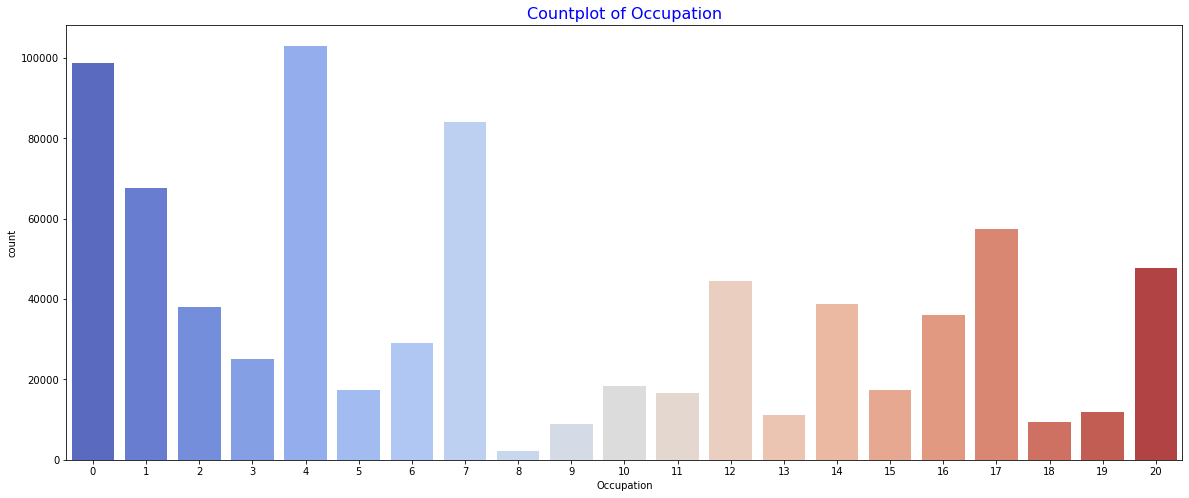

In [11]:
plt.figure(figsize = (20, 8))
sns.countplot(data['Occupation'], palette = 'coolwarm')
plt.title('Countplot of Occupation', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

* Majority of people are doing Occupation no. '0', '4' and '7'.

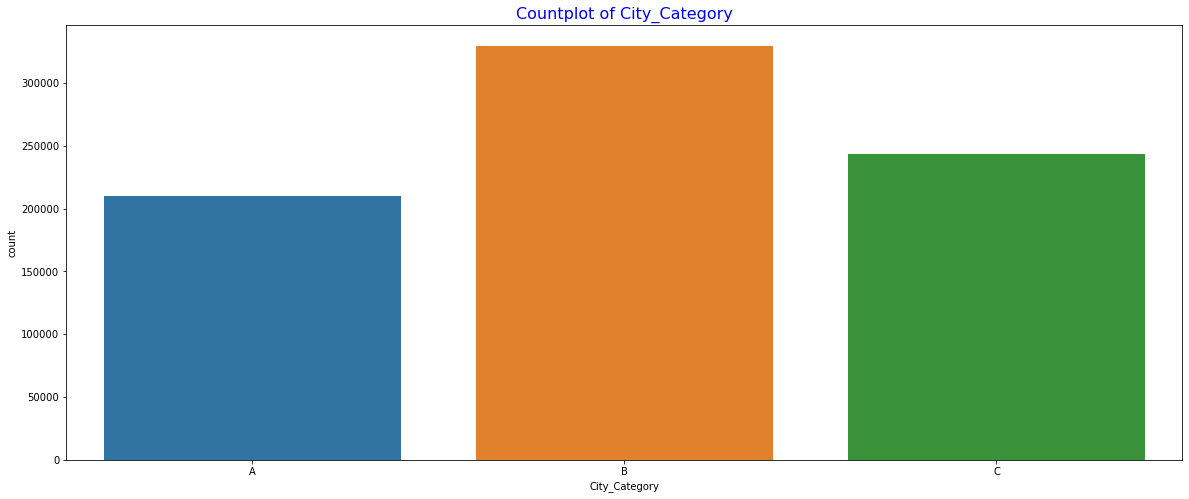

In [12]:
plt.figure(figsize = (20, 8))
sns.countplot(data['City_Category'], order = sorted(data['City_Category'].unique()))
plt.title('Countplot of City_Category', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

* Majority of people are living in City_Category 'B'.

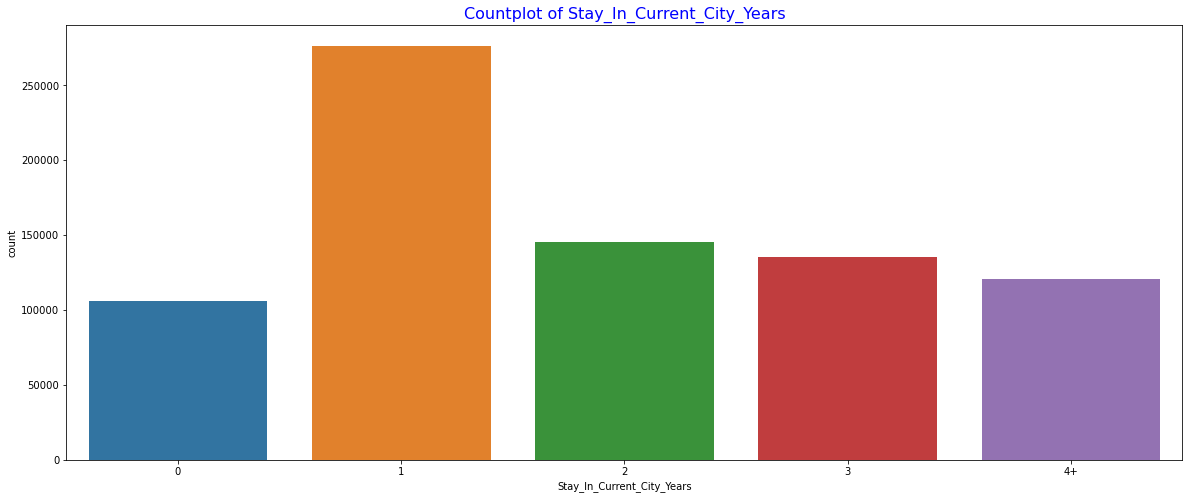

In [13]:
plt.figure(figsize = (20, 8))
sns.countplot(data['Stay_In_Current_City_Years'], order = sorted(data['Stay_In_Current_City_Years'].unique()))
plt.title('Countplot of Stay_In_Current_City_Years', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

* Majority of people have Stay_In_Current_City_Years '1'.

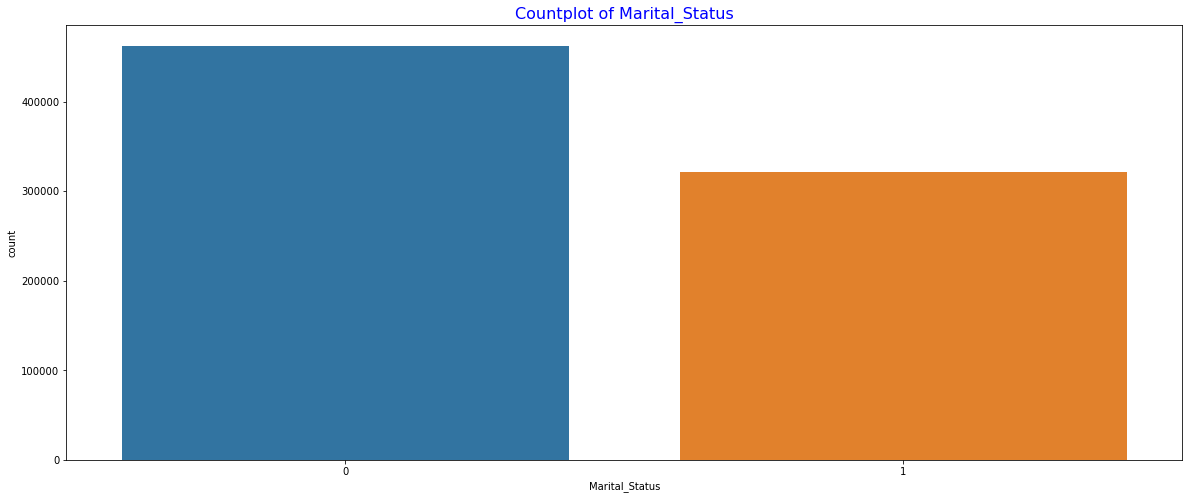

In [14]:
plt.figure(figsize = (20, 8))
sns.countplot(data['Marital_Status'])
plt.title('Countplot of Marital_Status', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

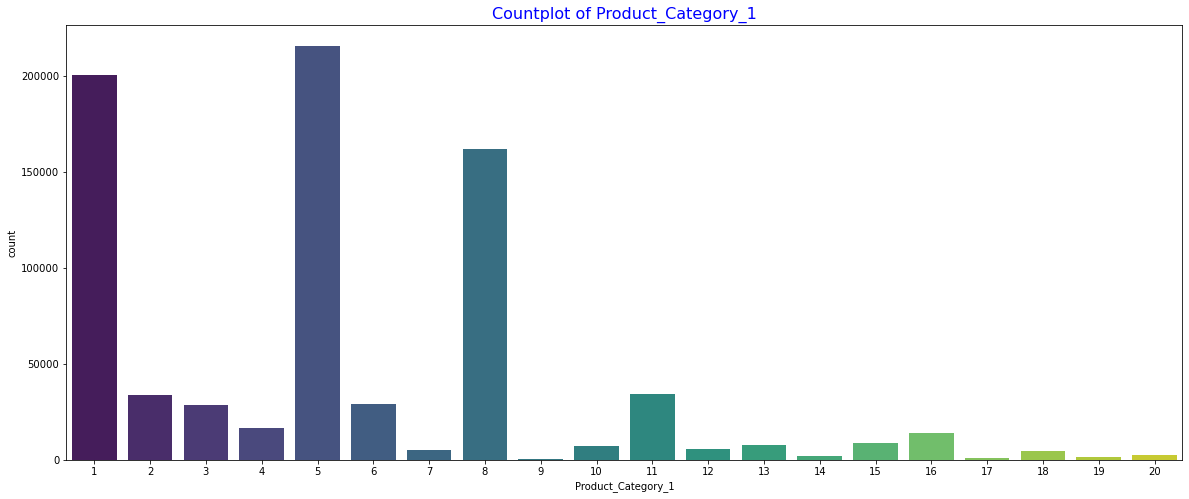

In [15]:
plt.figure(figsize = (20, 8))
sns.countplot(data['Product_Category_1'], palette = 'viridis')
plt.title('Countplot of Product_Category_1', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

* Majority of products are belongs to Product_Categroy_1 '1', '5' and '8'.

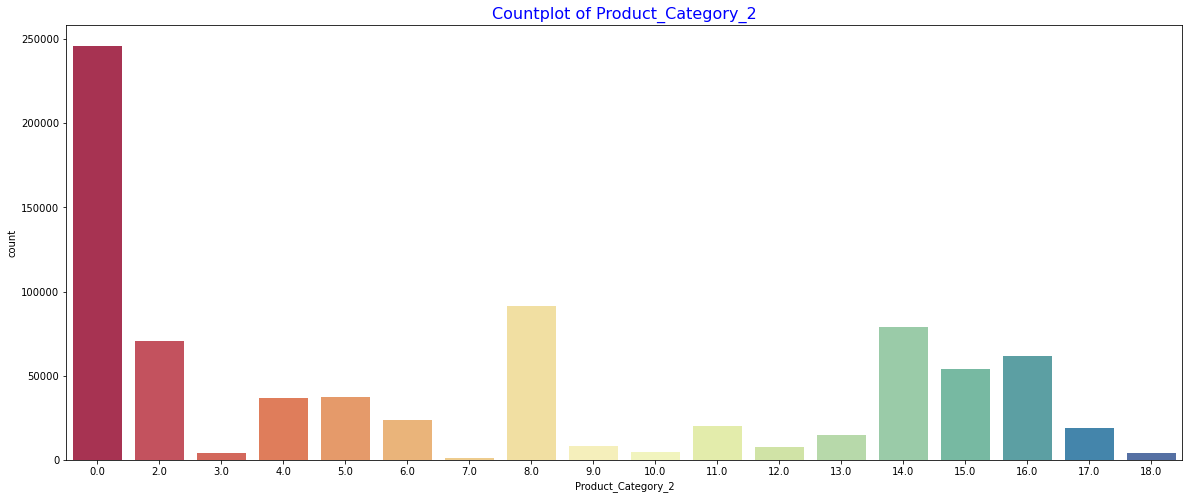

In [16]:
plt.figure(figsize = (20, 8))
sns.countplot(data['Product_Category_2'], palette = 'Spectral')
plt.title('Countplot of Product_Category_2', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

* Majority of products are not under Product_Category_2.

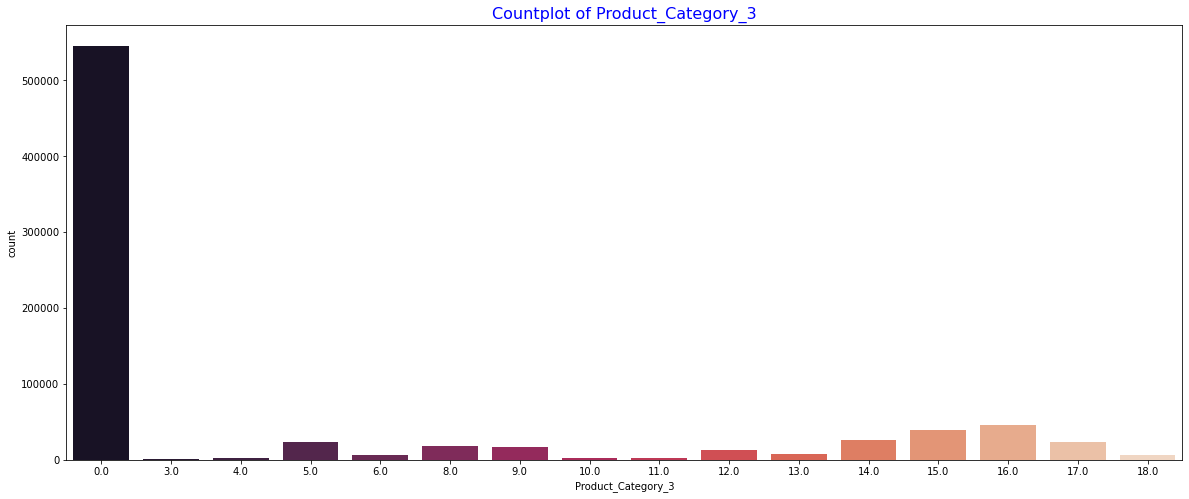

In [17]:
plt.figure(figsize = (20, 8))
sns.countplot(data['Product_Category_3'], palette = 'rocket')
plt.title('Countplot of Product_Category_3', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

* Majority of products are not under Product_Category_3.

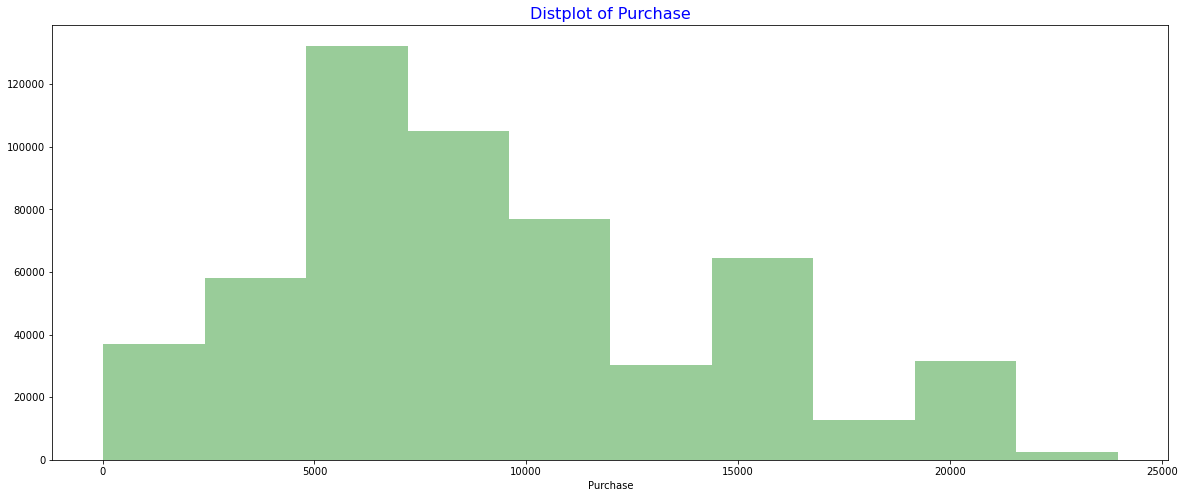

In [18]:
plt.figure(figsize = (20, 8))
sns.distplot(data['Purchase'], kde = False, bins = 10, color = 'g')
plt.title('Distplot of Purchase', fontdict = {'fontsize' : '16', 'color' : 'blue'})
plt.show()

### Single Variable Data Analysis Summary

* Majority are Males.
* Majority of the people are in between Age 26-35.
* Majority of people are doing Occupation no. '0', '4' and '7'.
* Majority of people are living in City_Category 'B'.
* Majority of people have Stay_In_Current_City_Years '1'.
* Majority of products are belongs to Product_Categroy_1 '1', '5' and '8'.
* Majority of products are not under Product_Category_2 and Product_Category_2.

## Multivariable Data Analysis

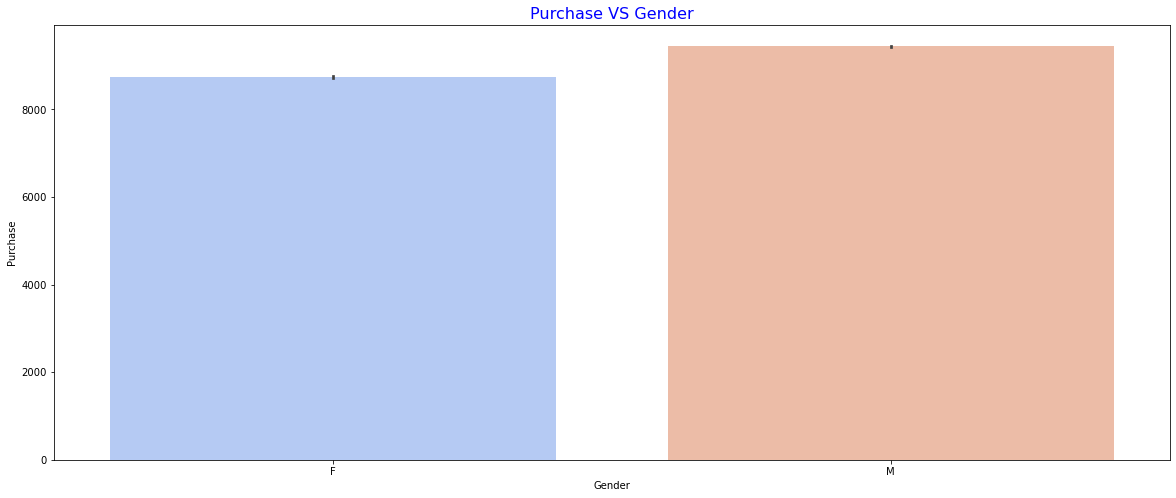

In [19]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Gender', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS Gender', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

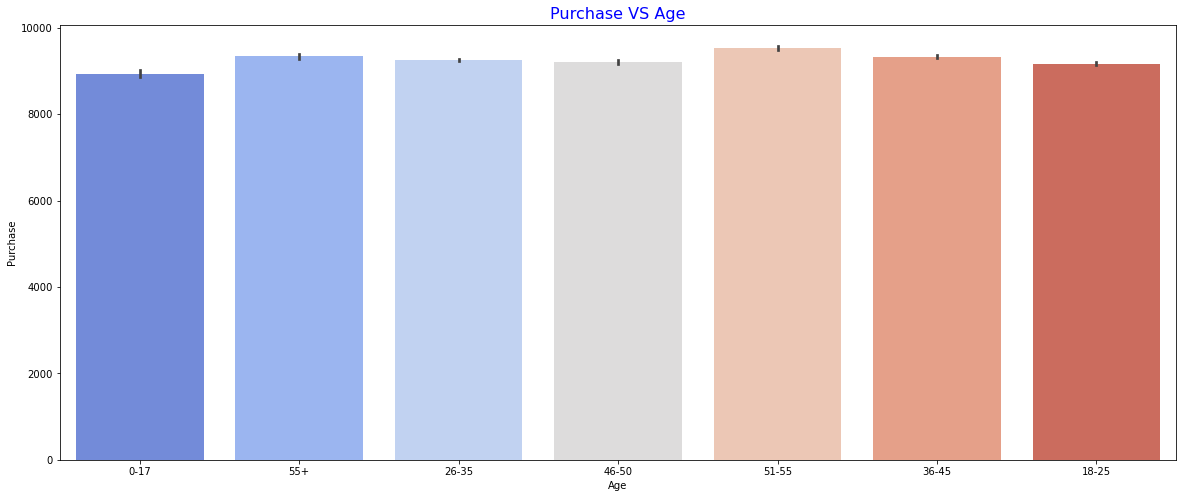

In [20]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Age', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS Age', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

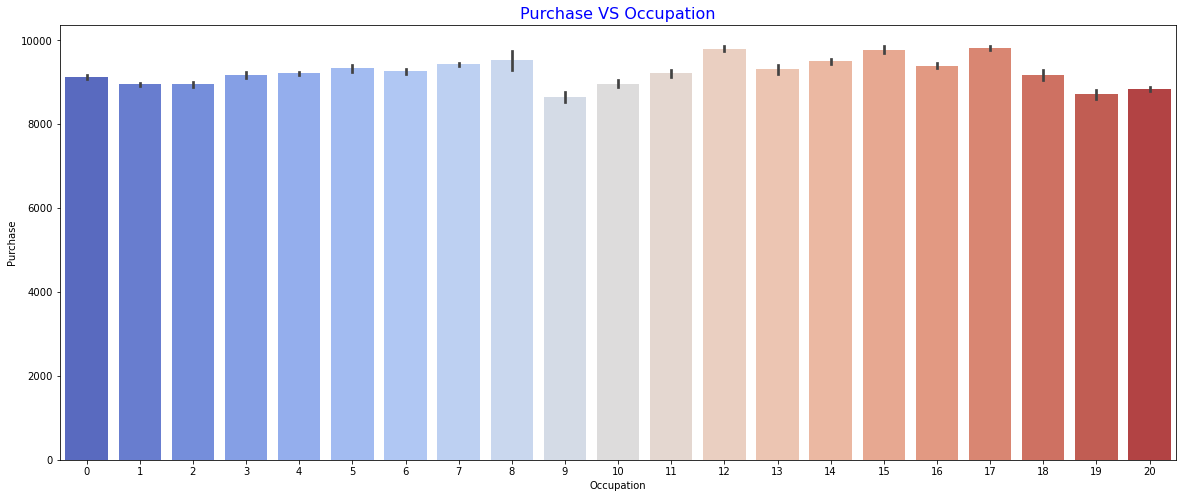

In [21]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Occupation', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS Occupation', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

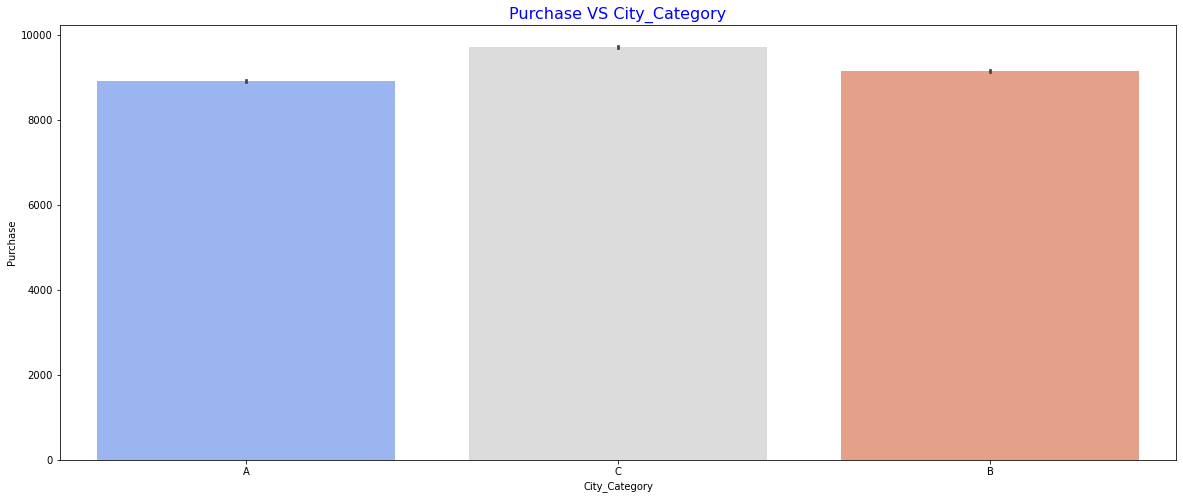

In [22]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'City_Category', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS City_Category', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

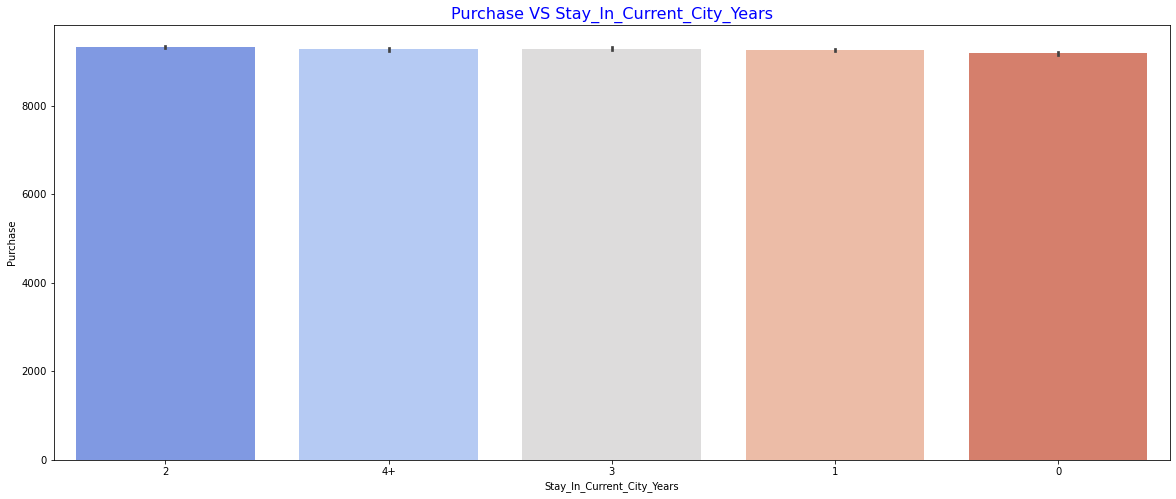

In [23]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS Stay_In_Current_City_Years', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

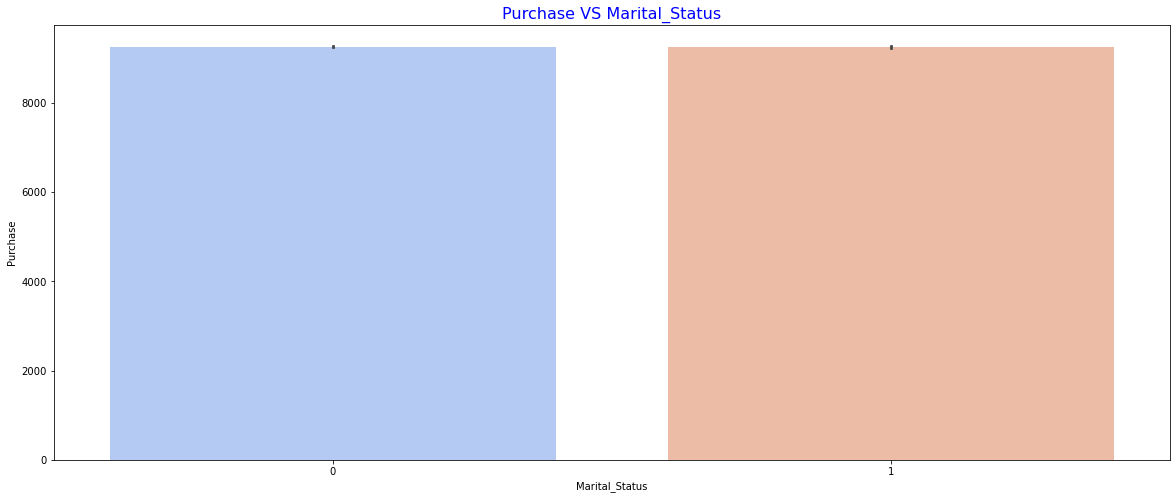

In [24]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Marital_Status', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS Marital_Status', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

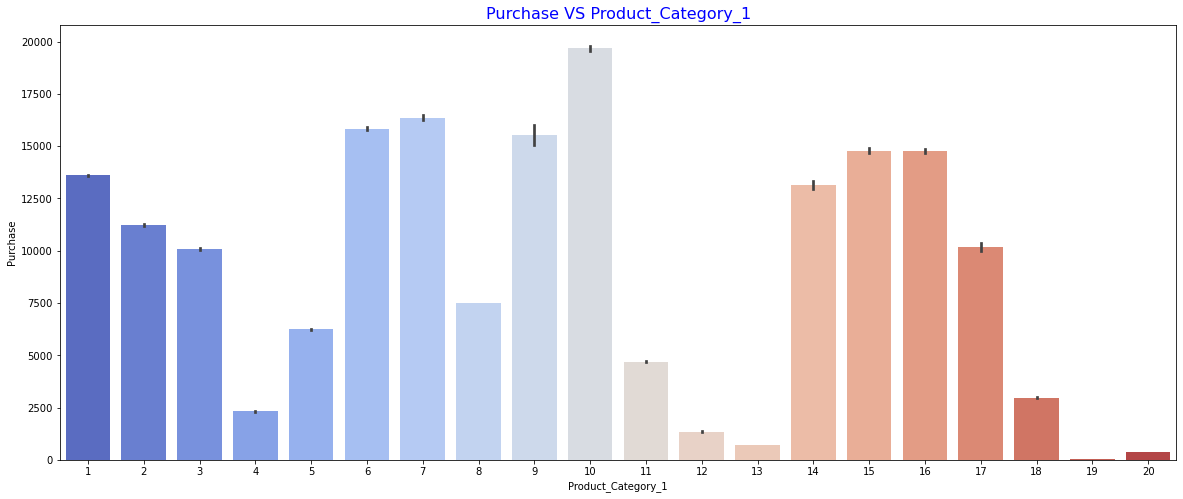

In [25]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Product_Category_1', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS Product_Category_1', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

From the above graph,                                                                                                           
In Product_Category_1, '10' has the most sales.                                                                                 
In Product_Category_1, '4', '12', '13', '18', '19', '20' have the least sales.

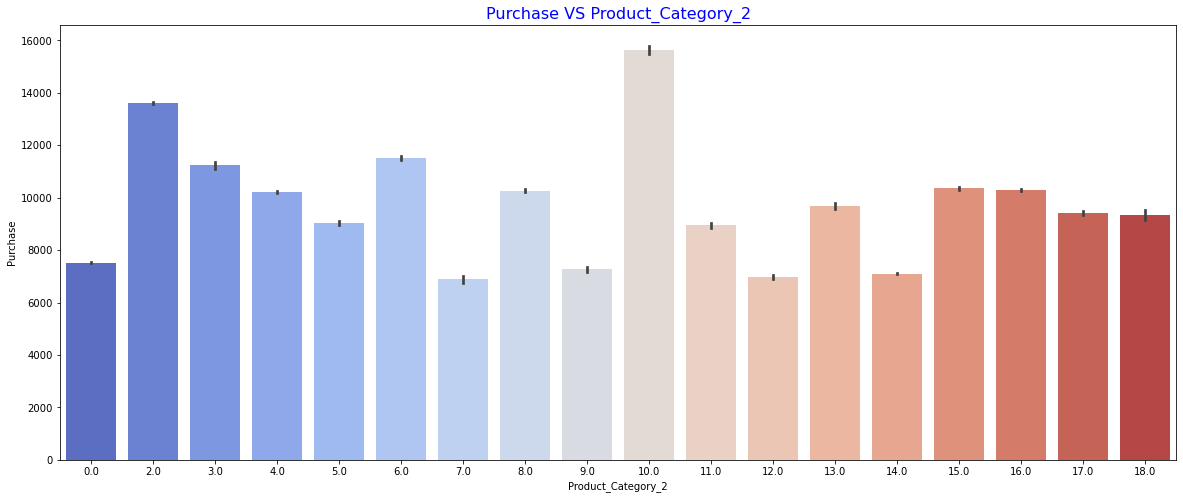

In [26]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Product_Category_2', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS Product_Category_2', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

From the above graph,                                                                                                           
In Product_Category_2, '10' has the most sales.

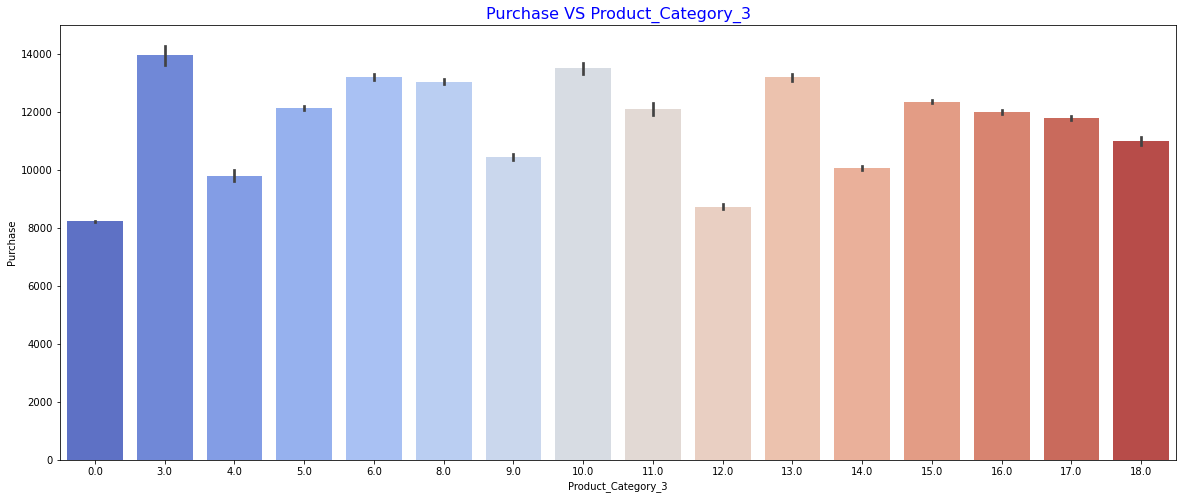

In [27]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Product_Category_3', y = 'Purchase', data = data, palette = 'coolwarm')
plt.title('Purchase VS Product_Category_3', fontdict = {'fontsize' : 16, 'color' : 'blue'})
plt.show()

From the above graph,                                                                                                           
In Product_Category_3, '3' has the most sales followed by '10', '6', '13', '8', '5'.

### Multivariable Data Analysis Summary 

* In Product_Category_1, '10' has the most sales.                                                                               
* In Product_Category_1, '4', '12', '13', '18', '19', '20' have the least sales.
* In Product_Category_2, '10' has the most sales.
* In Product_Category_3, '3' has the most sales followed by '10', '6', '13', '8', '5'.

## Data Preprocessing

In [28]:
data['Gender'] = data['Gender'].map({'M' : 1,
                                     'F' : 0})

data['Age'] = data['Age'].map({'0-17' : 0,
                               '18-25' : 1,
                               '26-35' : 2,
                               '36-45' : 3,
                               '46-50' : 4,
                               '51-55' : 5,
                               '55+' : 6})

data['City_Category'] = data['City_Category'].map({'A' : 0,
                                                   'B' : 1,
                                                   'C' : 2})

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0' : 0,
                                                                             '1' : 1,
                                                                             '2' : 2,
                                                                             '3' : 3,
                                                                             '4+' : 4})

In [29]:
data['Product_Category_2'] = data['Product_Category_2'].astype('int')
data['Product_Category_3'] = data['Product_Category_3'].astype('int')

## Feature Engineering

In [30]:
x = data.groupby(['Product_ID'])['Product_ID'].agg('count')
data['Product_Count'] = data['Product_ID'].apply(lambda y : x[y])

In [31]:
x1 = data.groupby('Product_ID')['Purchase'].mean()
data['Product_purchase_mean'] = data['Product_ID'].apply(lambda y : x1[y])

In [32]:
data['Product_Category_1'] = data['Product_Category_1'].astype('str')
x2 = data.groupby('Product_Category_1')['Purchase'].mean()
data['Product_C1_purchase_mean'] = data['Product_Category_1'].apply(lambda y : x2[y])

In [33]:
data['Product_Category_2'] = data['Product_Category_2'].astype('str')
x3 = data.groupby('Product_Category_2')['Purchase'].mean()
data['Product_C2_purchase_mean'] = data['Product_Category_2'].apply(lambda y : x3[y])

In [34]:
data['Product_Category_3'] = data['Product_Category_3'].astype('str')
x4 = data.groupby('Product_Category_3')['Purchase'].mean()
data['Product_C3_purchase_mean'] = data['Product_Category_3'].apply(lambda y : x4[y])

In [35]:
data['Product_Category_1'] = data['Product_Category_1'].astype('int')
data['Product_Category_2'] = data['Product_Category_2'].astype('int')
data['Product_Category_3'] = data['Product_Category_3'].astype('int')

In [36]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,Product_Count,Product_purchase_mean,Product_C1_purchase_mean,Product_C2_purchase_mean,Product_C3_purchase_mean
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370.0,train,344,11870.863436,10096.705734,7518.695389,8221.836943
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200.0,train,845,16304.030981,13606.218596,11503.551379,10052.594530
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422.0,train,150,1237.892157,1350.859894,7518.695389,8221.836943
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057.0,train,496,1455.140762,1350.859894,7105.264916,8221.836943
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969.0,train,283,7692.763547,7498.958078,7518.695389,8221.836943


## Final Data

In [37]:
train = data[data['source'] == 'train'].drop('source', axis = 1)
test = data[data['source'] == 'test'].drop(['source', 'Purchase'], axis = 1)

train.shape, test.shape

((550068, 17), (233599, 16))

In [38]:
features = train.drop(['User_ID', 'Product_ID', 'Purchase'], axis = 1).columns
target = 'Purchase'

# Model Creation and Training

In [39]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 1100, max_depth = 9, learning_rate = 0.03, colsample_bytree = 0.9,
                     colsample_bylevel = 0.9, colsample_bynode = 0.9, reg_alpha = 2, reg_lambda = 2,
                     random_state = 17)

model.fit(train[features].values, train[target].values.reshape(len(train), 1))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=0.9, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=17,
             reg_alpha=2, reg_lambda=2, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
predictions = model.predict(test[features].values)

In [41]:
pred_xg = pd.DataFrame()
pred_xg['User_ID'] = test['User_ID'].values
pred_xg['Product_ID'] = test['Product_ID'].values
pred_xg['Purchase'] = predictions

In [42]:
pred_xg.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,16630.058594
1,1000009,P00113442,11676.812500
2,1000010,P00288442,6012.090820
3,1000010,P00145342,2015.778931
4,1000011,P00053842,2547.563232


In [43]:
pred_xg.to_csv('BlackFridaySalesPredictionSet.csv', index = False)

# Thank You